In [155]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np 

In [156]:
assets = pd.read_csv("/home/aadrian/Documents/Clim_map/data/assets/pro_assets.csv", index_col=0)
assets.head()

,City,Adress,Street,Prov,Zip,"Lat,Lon",Lat,Lon,Price,FWI,Season_Length
0,Brooks,220.0,2 St W,AB,T1R 0S3,"50.5665875158811, -111.89847582938071",50.566588,-111.898476,10000000.0,47.891525,219.65735
1,Pincher Creek,732.0,Main St,AB,T0K 1W0,"49.48547621120782, -113.94822344661871",49.485476,-113.948223,10000000.0,53.704994,223.10602
2,Cardston,204.0,Main St,AB,T0K 0K0,"49.200229091382745, -113.30140137225571",49.200229,-113.301401,10000000.0,55.580292,222.25998
3,High River,102.0,3 Ave SW,AB,T1V 1R3,"50.58033026999468, -113.87239511997352",50.580330,-113.872395,10000000.0,49.142036,217.99535
4,Calgary,339.0,8 Ave SW,AB,T2P 1C9,"51.04556519075384, -114.06998973306004",51.045565,-114.069990,10000000.0,48.768559,215.99140


In [157]:
def load_fwi_and_sznlen():
    fwi = pd.read_csv("/home/aadrian/Documents/Clim_map/bin/notebooks/preprocessing/fwi.csv", index_col=0)
    szn_len = pd.read_csv("/home/aadrian/Documents/Clim_map/bin/notebooks/preprocessing/szn_len.csv", index_col=0)

    merged = fwi.merge(szn_len, on=('lon','lat'))

    merged = merged[~merged.szn_len.isna()]

    merged['fwi'] = merged['fwi'].astype(float)
    merged['szn_len'] = merged['szn_len'].astype(int)
    return merged

fire_data = load_fwi_and_sznlen()

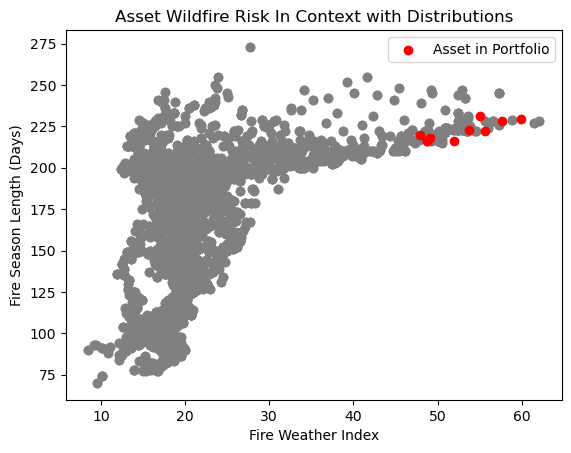

In [177]:

# Your existing scatter plots
plt.scatter(x=fire_data.fwi, y=fire_data.szn_len, color='grey')
plt.scatter(x=assets.FWI, y=assets.Season_Length, color='red', label='Asset in Portfolio')

# Add title and labels
plt.title("Asset Wildfire Risk In Context with Distributions")
plt.xlabel("Fire Weather Index")
plt.ylabel("Fire Season Length (Days)")

# Add legend
plt.legend()

# Show plot
plt.show()


In [165]:
data = assets[['FWI', 'Season_Length']]
data.columns=['fwi','szn_len']

# Assuming null_distribution is your null distribution DataFrame
null_distribution = fire_data.loc[:,['fwi','szn_len']]
kde = gaussian_kde(null_distribution.T)

In [ ]:
# Evaluate the KDE at the sample points

asset_points = assets.loc[:,["FWI","Season_Length"]].T

def integrate(low_bounds, kde):
    p_val = kde.integrate_box(low_bounds=low_bounds, high_bounds=[np.inf, np.inf])
    return p_val

lo_pvals = [integrate(low_bounds, kde) for i, low_bounds in asset_points.T.iterrows()]


assets['empirical_pval'] = lo_pvals
assets.sort_values(by = 'empirical_pval')

,City,Adress,Street,Prov,Zip,"Lat,Lon",Lat,Lon,Price,FWI,Season_Length,empirical_pval
8,Oliver,6306.0,Main St,BC,V0H 1T0,"49.18429295295311, -119.5506960294492",49.184293,-119.550696,10000000.0,59.842194,229.37207,0.000437
9,Castlegar,1128.0,3 St,BC,V1N 1Z9,"49.326278247298106, -117.66505180249935",49.326278,-117.665052,10000000.0,57.604385,228.49263,0.001102
7,Vernon,2306.0,BC-6,BC,V1T 7E3,"50.25556096629964, -119.26298294789623",50.255561,-119.262983,10000000.0,54.976021,231.48398,0.002219
2,Cardston,204.0,Main St,AB,T0K 0K0,"49.200229091382745, -113.30140137225571",49.200229,-113.301401,10000000.0,55.580292,222.25998,0.002877
1,Pincher Creek,732.0,Main St,AB,T0K 1W0,"49.48547621120782, -113.94822344661871",49.485476,-113.948223,10000000.0,53.704994,223.10602,0.005194
6,Revelstoke,123.0,MacKenzie Ave,BC,V0E 2S0,"50.99901607946072, -118.19535130739008",50.999016,-118.195351,10000000.0,51.967316,215.96470,0.010412
3,High River,102.0,3 Ave SW,AB,T1V 1R3,"50.58033026999468, -113.87239511997352",50.580330,-113.872395,10000000.0,49.142036,217.99535,0.015848
0,Brooks,220.0,2 St W,AB,T1R 0S3,"50.5665875158811, -111.89847582938071",50.566588,-111.898476,10000000.0,47.891525,219.65735,0.016660
4,Calgary,339.0,8 Ave SW,AB,T2P 1C9,"51.04556519075384, -114.06998973306004",51.045565,-114.069990,10000000.0,48.768559,215.99140,0.017593
5,Calgary,411.0,58 Ave SE,AB,T2H 0P5,"51.00101526639408, -114.05628859100543",51.001015,-114.056289,10000000.0,48.768559,215.99140,0.017593


All assets are high risk. Assets exposure levels are high

Quantifying portoflio impact

* Calculate trailing probability of forest fire given FWI and season length and use to project probability of forest fire occuring in these areas in the future.
* Regress price onto probability of forest fire
* Evaluate how risk impacts income. If risk is too great increase premiums
* According to OSFI governance. Risks factors should be incorporated into Risk Appetite Framework and Enterprise Risk Management (ERM) framework. Model for physical rsisks should be built up, or third party framework should be used. Incorporate fire loss into stress testing and asset management of the bank.
